## Caso de Estudio 0

### Caso de Estudio
*Evolución de la Distribución Agregada de Pérdidas*

### Objetivos del Negocio
✓ Una FINTECH quiere caracterizar la evolución de sus pérdidas en la colocación de sus créditos para los últimos cuatro años de operación.

### Abstracción
✓ Para la caracterización de la distribución agregada de pérdidas, se utilizarán como referencias las variables: Probabilidad de Default, Exposición del Activo, LGD (Garantía del Crédito).  
✓ La entidad financiera posee un horizonte de pérdidas que cubre un total de 4 años (Año 1, Año 2, Año 3, Año 4), para lo cual se quiere evaluar la evolución de las pérdidas durante este período.

### Técnica a utilizar
✓ Medidas de Tendencia Central y Dispersión: Las medidas de tendencia central y dispersión agrupan una serie de medidas que permiten la caracterización empírica de una distribución de probabilidad. Entre las medidas de tendencia central se destacan: Media, Varianza, Coeficiente de Asimetría y Coeficiente de Curtosis.  
✓ Las medidas de tendencia central determinan los parámetros del riesgo: Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastróficas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para grafico de distribuciones

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Paso 1**
Unimos todas las hojas de exel en XDB

In [ ]:
nxl ='/content/drive/MyDrive/Integración de datos y prospec/1. SolicitantesCrédito(USD)_Años.xlsx'

hojas = ["Año 1", "Año 2", "Año 3", "Año 4"]
bases = []
for hoja in hojas:
    df = pd.read_excel(nxl, sheet_name=hoja)
    df["Año"] = hoja
    bases.append(df)

XDB = pd.concat(bases, ignore_index=True)
display(XDB.head())

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD,Año
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573,Año 1
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300,Año 1
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118,Año 1
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498,Año 1
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469,Año 1


# **Paso 2**
se creo un anueva variable que se llama perdida esperada que muestra la evolución de las pérdidas

In [ ]:
# Paso 2: Calcular la Pérdida Esperada

# Usar los nombres reales de las columnas
XDB["Perdida_Esperada"] = XDB["Prob.Default (PD)"] *(1+XDB["LGD"]) * XDB["Monto (EAD)"]

# 2. Group the XDB_years DataFrame by the 'Year' column and 3. For each year, calculate the sum of the 'Aggregate_Loss' column.
Perdida_Esperada_Años = XDB.groupby('Año')['Perdida_Esperada'].sum()

display(Perdida_Esperada_Años)

,Perdida_Esperada
Año,
Año 1,74526.841756
Año 2,84463.281274
Año 3,81277.848258
Año 4,83291.892147


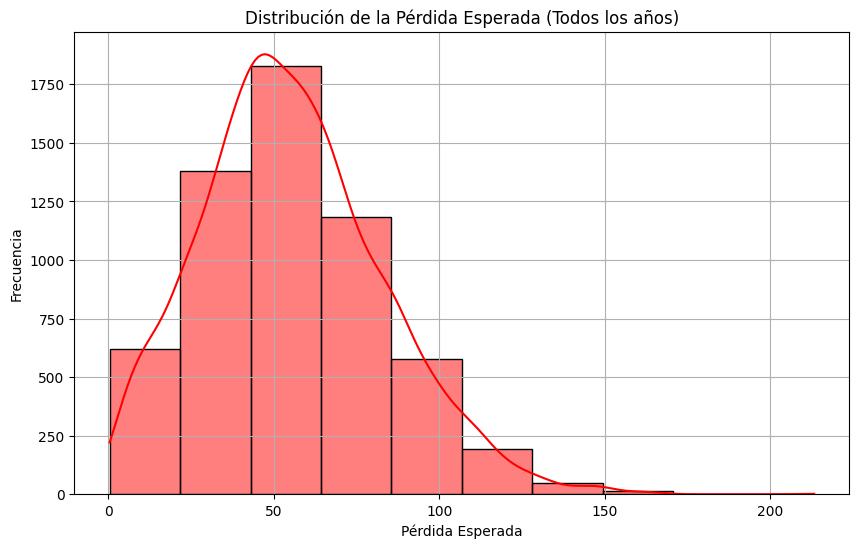

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(XDB["Perdida_Esperada"], kde=True, bins=10, color='red')
plt.title("Distribución de la Pérdida Esperada (Todos los años)")
plt.xlabel("Pérdida Esperada")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

 comparar cómo ha evolucionado la pérdida esperada a lo largo del tiempo.

/tmp/ipython-input-3977395895.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Año")


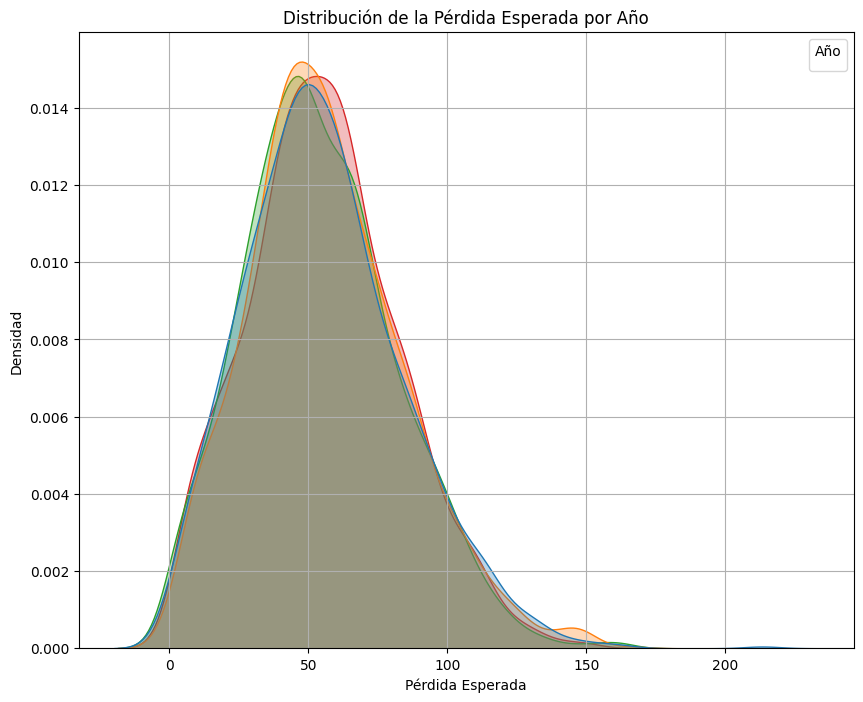

In [ ]:
# Eliminar filas con valores faltantes en 'Perdida_Esperada' y 'Año'
XDB_filtrado = XDB.dropna(subset=["Perdida_Esperada", "Año"])

# Convertir la columna 'Año' a string por si hay problemas con tipos
XDB_filtrado["Año"] = XDB_filtrado["Año"].astype(str)

# Graficar nuevamente la distribución por año
plt.figure(figsize=(10, 8))
sns.kdeplot(data=XDB_filtrado, x="Perdida_Esperada", hue="Año", common_norm=False, fill=True, alpha=0.3)
plt.title("Distribución de la Pérdida Esperada por Año")
plt.xlabel("Pérdida Esperada")
plt.ylabel("Densidad")
plt.grid(True)
plt.legend(title="Año")
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Eliminar filas con datos faltantes y convertir año a string
XDB_filtrado = XDB.dropna(subset=["Perdida_Esperada", "Año"])
XDB_filtrado["Año"] = XDB_filtrado["Año"].astype(str)

# Calcular media y varianza por año
estadisticas_anuales = XDB_filtrado.groupby("Año")["Perdida_Esperada"].agg(
    media="mean",
    varianza="var"
).copy()

# Calcular asimetría y curtosis con scipy
estadisticas_anuales["asimetria"] = XDB_filtrado.groupby("Año")["Perdida_Esperada"].apply(skew)
estadisticas_anuales["curtosis"] = XDB_filtrado.groupby("Año")["Perdida_Esperada"].apply(kurtosis)

# Mostrar tabla final
display(estadisticas_anuales)

,media,varianza,asimetria,curtosis
Año,,,,
Año 1,55.534159,809.450649,0.607448,0.693889
Año 2,56.308854,771.754817,0.565422,0.374982
Año 3,54.149133,742.199219,0.462190,0.188596
Año 4,55.527928,723.910546,0.335441,-0.062854


# Analisis

1. cargamos la base de datos y agrupamos todos los años en XDB
2. cree una nueva variable que se llama perdida esperada que y muestra la evolución de las pérdidas año tras año.
Año 1	74526.841756
Año 2	84463.281274
Año 3	81277.848258
Año 4	83291.892147
en donde podemos destacar que el año donde mas se perdio dinero fue en el 2 y podria ser por diferentes razones como la entrega de creditos más grandes o muchos creditos dados.
3. Segun la grafica de Distribución de la Pérdida Esperada de todos los años podemos analizar que la fintech tiene un portafolio de clientes relativamente buenos ya que la mayoria de los clientes se encuentran como entre 30 y 70 osea sin mucho riesgo de perdida comparandolo con la media.
4. Esta grafica muestra La Distribución de la Pérdida Esperada por Año y como podemos ver son muy similares las graficas por lo que concluimos que todos los años el riesgo ha estado estable.
5.
media (Pérdida promedio por crédito): la media como podemos ver se matuvo muy estable durante los 4 años sin embargo el año mas alto fue el 2 que va de la mano que tambien dice que el año con mas perdida esperada era el dos aunque esto no quiere decir que sea el año donde vayan a perder más sino el año mas riesgoso.

varianza	(Dispersión de las pérdidas): El primer año fue donde hubo más diferencia entre los creditos buenos y malos y el año con los creditos mas homogeneos fue el año 4.

asimetria	(Skewness): Entre mas se aleje de cero quiere decir que es más desigual la distribución de los datos por ejemplo el Año 1 fue el más desigual (asimetría 0.61 y es casos extremos con perdidas altas), mientras que el Año 4 fue el más balanceado (0.33 osea más homogeneo).

curtosis (Valores extremos / colas pesadas): Como todos los valores estan cerca a 0 quiere decir que las pérdidas esperadas están distribuidas de manera moderada sin ebargo el primer año es el mas propenso a tener valores atipicos y aunque el año 4 dio negativo no está mal, esto quiere decir que sus datos fueron mas planos.